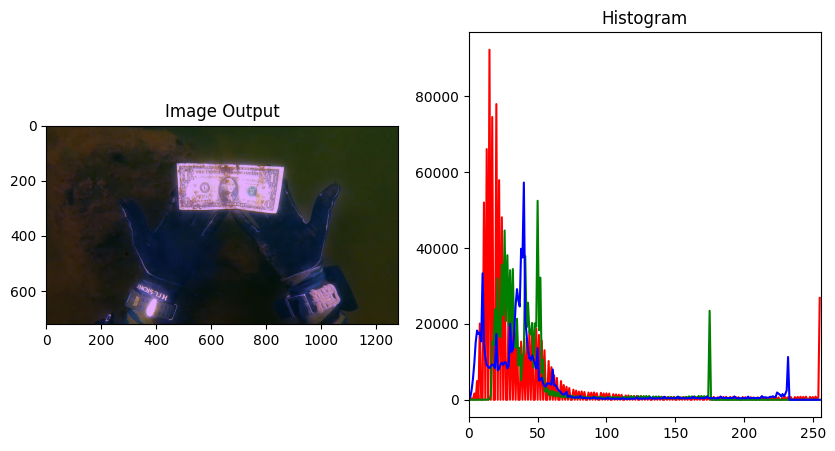

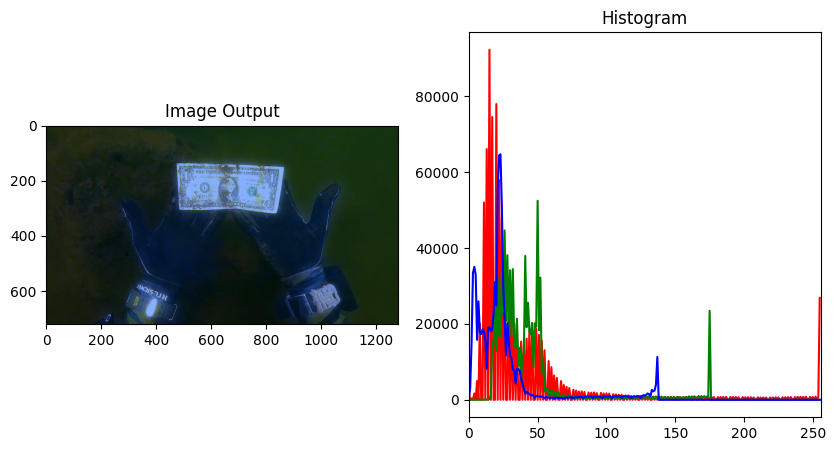

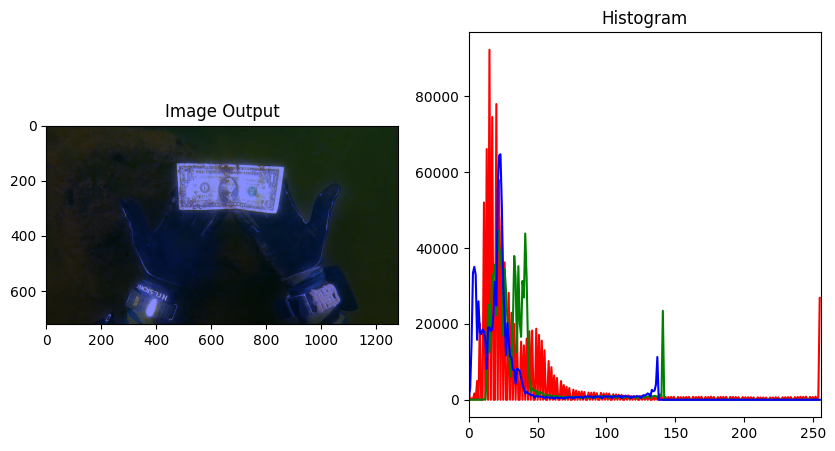

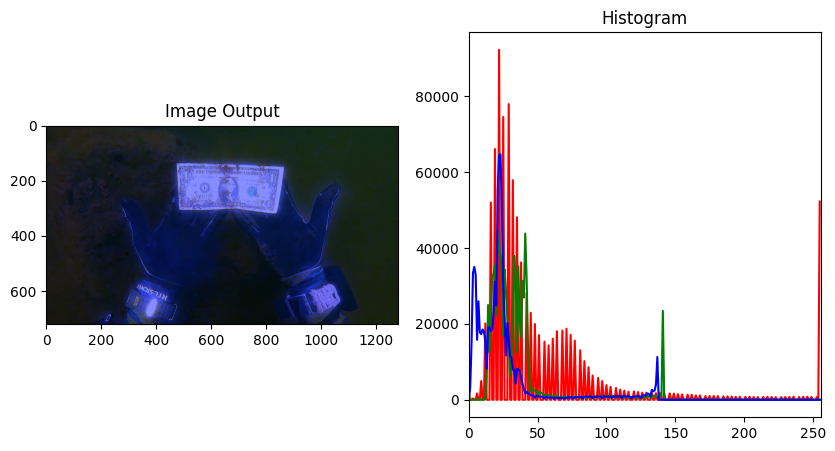

In [2]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
import math
import tkinter as tk
from tkinter import ttk
option_x=0
def update_image():
    red_val = red_slider.get()
    green_val = green_slider.get()
    blue_val = blue_slider.get()
    
    red = red_val
    green = green_val
    blue = blue_val

    img = cv2.imread('C:/College Projects/Applied LA for ML/codes/stretched_image.png')
    img_1 = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    shape = img.shape
    average_channel_0 = np.average(img_1[:, :, 0])
    average_channel_1 = np.average(img_1[:, :, 1])
    average_channel_2 = np.average(img_1[:, :, 2])

    average_channels = 128

    if option_x == 0:
        average_channels = (average_channel_0 + average_channel_1 + average_channel_2) / 3

    img_output = np.zeros(shape)

    for i in range(shape[0]):
        for j in range(shape[1]):
                img_output[i][j][2] = ((average_channels / average_channel_0) * img_1[i][j][0])*red
                img_output[i][j][1] = ((average_channels / average_channel_1) * img_1[i][j][1])*green
                img_output[i][j][0] = ((average_channels / average_channel_2) * img_1[i][j][2])*blue

    img_output_final = np.clip(img_output, 0, 255).astype('uint8')
    # Display image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_output_final, cv2.COLOR_BGR2RGB))
    plt.title('Image Output')

    # Plot histograms
    plt.subplot(1, 2, 2)
    colors = ('r', 'g', 'b')
    for i, col in enumerate(colors):
        histr = cv2.calcHist([img_output_final], [i], None, [256], [0, 256])
        plt.plot(histr, color=col)
        plt.xlim([0, 256])
    plt.title('Histogram')
    plt.show()

# Create tkinter window
root = tk.Tk()
root.title("Color Adjustment")

# Create sliders for red, green, and blue values
red_label = tk.Label(root, text="Red")
red_label.pack()
red_slider = ttk.Scale(root, from_=-5, to=5, orient="horizontal", length=200)
red_slider.set(1)
red_slider.pack(padx=10, pady=5)

green_label = tk.Label(root, text="Green")
green_label.pack()
green_slider = ttk.Scale(root, from_=-5, to=5, orient="horizontal", length=200)
green_slider.set(1)
green_slider.pack(padx=10, pady=5)

blue_label = tk.Label(root, text="Blue")
blue_label.pack()
blue_slider = ttk.Scale(root, from_=-5, to=5, orient="horizontal", length=200)
blue_slider.set(1)
blue_slider.pack(padx=10, pady=5)

def apply_changes():
    update_image()

# Create Apply button
apply_button = tk.Button(root, text="Apply", command=apply_changes)
apply_button.pack(padx=10, pady=5)

# Initial image display
update_image()

root.mainloop()
